In [16]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom import pickle_load

from lagom.core.plotter import CurvePlot

In [17]:
log_folder = Path('logs')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,network.recurrent,network.hidden_size,es.popsize,es.mu0,es.std0,train.num_iteration,train.N,train.T,log.interval,log.dir
0,0,False,Pendulum-v0,False,[32],128,0.0,0.5,1000,5,300,100,logs


In [18]:
def load_results(log_folder, ID):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/'result.pkl').exists():
            list_result.append(pickle_load(sub/'result.pkl'))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        returns.append(result['best_return'])
        
    return returns

In [19]:
list_result = load_results('logs/', 0)
returns = get_returns(list_result)

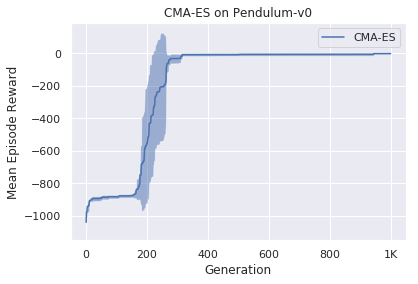

In [20]:
plot = CurvePlot()
plot.add('CMA-ES', returns)
ax = plot(title='CMA-ES on Pendulum-v0', 
          xlabel='Generation', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

In [21]:
ax.figure.savefig('data/result.png')